In [4]:
#import
import pandas as pd
import numpy as np

#plot
import matplotlib.pyplot as plt
%matplotlib inline

#set figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#normalise
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read file
df = pd.read_csv("BTC_DATA.csv")

#print head
df.head(10)
df.tail()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
2086,BTC,2019-06-25T22:59:58.000Z,11665.409684,10996.453282,11704.621896,10951.025020
2087,BTC,2019-06-26T22:59:59.000Z,12444.925860,11668.665857,13879.237706,11625.881090
2088,BTC,2019-06-27T23:00:00.000Z,11086.268829,12444.922343,13328.580313,10314.753873
2089,BTC,2019-06-28T23:00:00.000Z,12316.953012,11086.235715,12402.043512,10789.984140
2090,BTC,2019-06-29T22:59:59.000Z,12024.080972,12360.187098,12381.041702,11368.274496


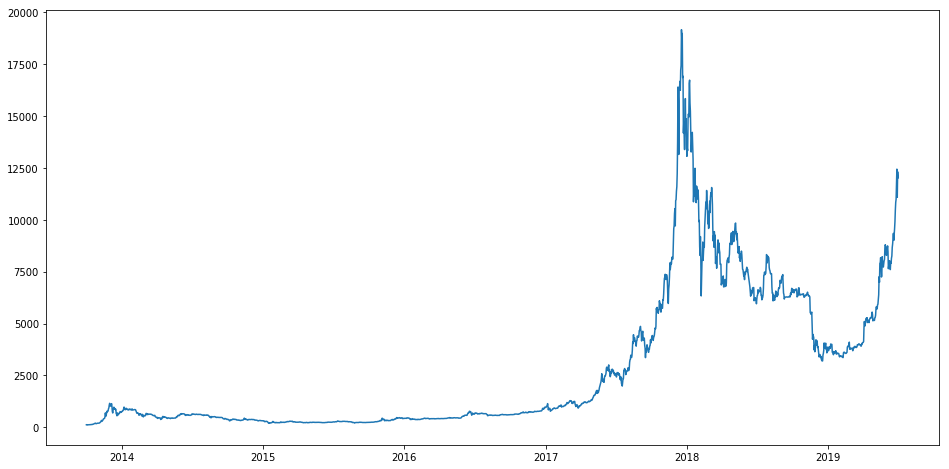

In [7]:
#set date as index
df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16, 8))
plt.plot(df['Closing Price (USD)'], label="Close price history")

In [13]:
#create dataframe with data and target variable
data = df.sort_index(ascending=True, axis = 0)
new_data = pd.DataFrame(index=range(0, len(df)), columns=['Date', 'Close'])

for i in range(0, len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Closing Price (USD)'][i]
    
#split into train and validation, preserving time component
train = new_data[:1700]
valid = new_data[1700:]

new_data.shape, train.shape, valid.shape

((2091, 2), (1700, 2), (391, 2))

In [16]:
#predict
preds = []
for i in range(0, 391):
    a = train['Close'][len(train) - 391 + i].sum() + sum(preds)
    b = a/391
    preds.append(b)

## Markdown

In [18]:
#calculate 
output = np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds), 2)))
output

6071.3296604831185

/Users/andrew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/andrew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


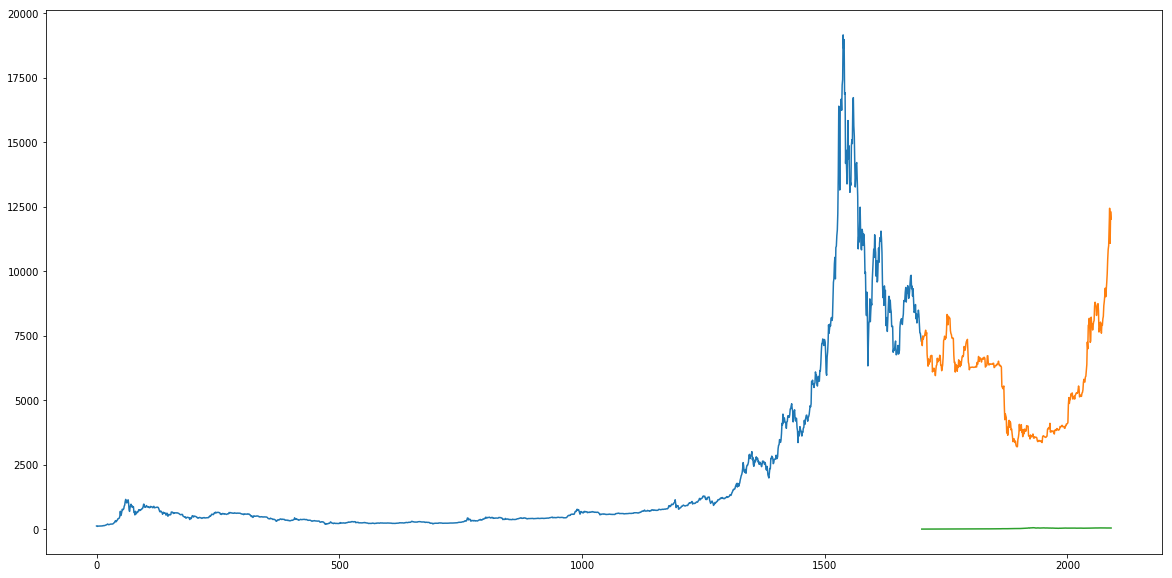

In [31]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])